<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/day9_naive_bayes_suv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('/content/sample_data/SUV_Purchase.csv')

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.drop('Gender',axis=1)
df=df.drop('User ID',axis=1)

In [4]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sc.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
data_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [5]:
data_scaled.columns=['Age','EstimatedSalary']

data_scaled.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [6]:
data_scaled['Purchased'] = df.Purchased
data_scaled = data_scaled[data_scaled['Purchased'].notna()]
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [7]:
#loading the data
x=data_scaled.iloc[:,:-1].values #loading the independent column values into x
y=data_scaled.iloc[:,-1:].values #loading the dependent column values into y

In [8]:
#spliting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [10]:
x_train

array([[ 1.94321462,  2.18056084],
       [ 2.03872775,  0.38930459],
       [-1.30423178, -0.4329114 ],
       [-1.11320552, -1.02020853],
       [ 1.94321462, -0.93211396],
       [ 0.41500455,  0.30121002],
       [ 0.22397829,  0.15438573],
       [ 2.03872775,  1.76945285],
       [ 0.79705706, -0.84401939],
       [ 0.31949142, -0.28608712],
       [ 0.41500455, -0.16862769],
       [-0.0625611 ,  2.23929055],
       [-1.39974491, -0.63846539],
       [-1.20871865, -1.07893824],
       [-1.30423178,  0.41866944],
       [-1.01769239,  0.77104772],
       [-1.39974491, -0.19799255],
       [ 0.98808332, -1.07893824],
       [ 0.98808332,  0.59485858],
       [ 0.41500455,  1.00596657],
       [ 0.60603081, -0.9027491 ],
       [-0.54012675,  1.47580428],
       [ 0.03295203, -0.57973568],
       [-0.54012675,  1.91627713],
       [ 1.37013584, -1.43131652],
       [ 1.46564897,  1.00596657],
       [ 0.12846516, -0.81465453],
       [ 0.03295203, -0.25672226],
       [-0.15807423,

In [11]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [12]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.884375
Training accuracy: 88.4375


In [13]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.9125
Testing accuracy: 91.25


In [14]:
accuracy=model.score(x,y)*100
print(accuracy)

89.0


In [15]:
#converting 2D array to 1D array
#
y_train=y_train.flatten()

In [16]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


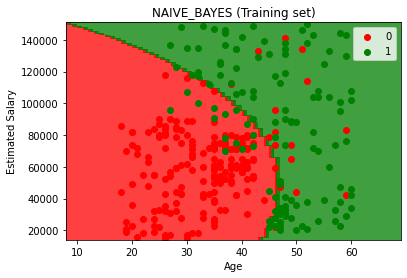

In [17]:
#visulization
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),

np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('NAIVE_BAYES (Training set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_train,model.predict(x_train))
print(cm)

#TN FP
#FN TP

[[183  16]
 [ 21 100]]


In [19]:
y_test=y_test.flatten()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


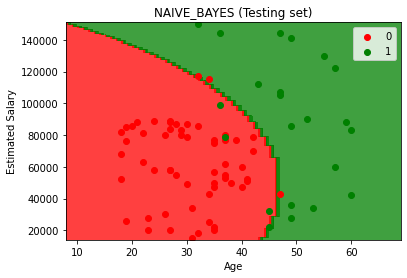

In [20]:
#visulization
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),

np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),

alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('NAIVE_BAYES (Testing set)')

plt.xlabel('Age')

plt.ylabel('Estimated Salary')

plt.legend()

plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
#TN FP
#FN TP

[[55  3]
 [ 4 18]]


0.9125

In [23]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
print('predicted training data',tree.score(x_train,y_train))
print('predicted testing data',tree.score(x_test,y_test))


predicted training data 0.996875
predicted testing data 0.9125


In [25]:
accuracy=tree.score(x,y)*100
print(accuracy)

98.0


In [26]:
#SVM
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(x_train,y_train)

SVC()

In [27]:
print('predicted training data',svm_clf.score(x_train,y_train))
print('predicted testing data',svm_clf.score(x_test,y_test))

predicted training data 0.903125
predicted testing data 0.95


In [28]:
accuracy=svm_clf.score(x,y)*100
print(accuracy)

91.25


In [29]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
print('predicted training data',forest.score(x_train,y_train))
print('predicted testing data',forest.score(x_test,y_test))

predicted training data 0.996875
predicted testing data 0.95


In [31]:
accuracy=forest.score(x,y)*100
print(accuracy)

98.75


In [32]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
print("Predicted value for training data:",model1.score(x_train,y_train))
print("Predicted value for testing data:",model1.score(x_test,y_test))

Predicted value for training data: 0.91875
Predicted value for testing data: 0.95


In [34]:
accuracy=model1.score(x,y)*100
print(accuracy)

92.5


In [35]:
#logistic
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [36]:
print("Predicted value for training data:",model2.score(x_train,y_train))
print("Predicted value for testing data:",model2.score(x_test,y_test))

Predicted value for training data: 0.821875
Predicted value for testing data: 0.925


In [37]:
accuracy=model2.score(x,y)*100
print(accuracy)

84.25


In [38]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

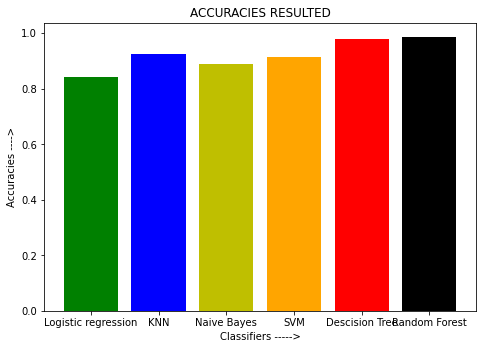

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([1,1,1,1])

algo = ['Logistic regression','KNN','Naive Bayes','SVM','Descision Tree','Random Forest']

accuracy = [model2.score(x,y),model1.score(x,y),model.score(x,y),svm_clf.score(x,y),tree.score(x,y),forest.score(x,y)]

ax.bar(algo[0],accuracy[0],color = 'g')
ax.bar(algo[1],accuracy[1],color = 'b')
ax.bar(algo[2],accuracy[2],color = 'y')
ax.bar(algo[3],accuracy[3],color = 'orange')
ax.bar(algo[4],accuracy[4],color = 'red')
ax.bar(algo[5],accuracy[5],color = 'black')

plt.xlabel('Classifiers ----->')
plt.ylabel('Accuracies ---->')
plt.title('ACCURACIES RESULTED')
plt.show()